In [1]:
import matplotlib.pyplot as plt
import numpy as np
from calculate_corrs import *
from spectrum_analysis import *

/home/joshua/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# GEVP

In [3]:
def get_spectrum(Nx, Nt, m_sq, lmbd, alpha, date):
    version = "3-1"
    
    # The number of trajectories until thermalization
    cutoff = 1000
    # The size of the blocks needed to get uncorrelated block averages
    block_size = 200
    
    C = Correlators(Nx, Nt, m_sq, lmbd, alpha, version, 32, cutoff, block_size)
    C.load(date)
    
    Spec = Spectrum(Nt, block_size)
    
    Spec.add_corrs("pipi", np.real(C.corrs["pipi"])/np.real(C.corrs["pipi"])[:,0,None])
    Spec.plot_corrs("pipi")
    Spec.add_corrs("pipim0", np.real(C.corrs["pipim"][0])/np.real(C.corrs["pipim"])[0,:,0,None])
    #Spec.plot_corrs("pipim0")
    Spec.add_corrs("ss", np.real(C.corrs["ss"])/np.real(C.corrs["ss"])[:,0,None])
    #Spec.plot_corrs("ss")
    Spec.add_corrs("pipi_pipi_I0", np.real(C.corrs["pipi_pipi_I0"])/np.real(C.corrs["pipi_pipi_I0"])[:,0,None])
    #Spec.plot_corrs("pipi_pipi_I0")
    Spec.add_corrs("pipi_pipi_I2", np.real(C.corrs["pipi_pipi_I2"])/np.real(C.corrs["pipi_pipi_I2"])[:,0,None])
    #Spec.plot_corrs("pipi_pipi_I2")
    Spec.add_corrs("pipi_s", np.real(C.corrs["pipi_s"])/np.real(C.corrs["pipi_pipi_I0"])[:,0,None]**0.5/np.real(C.corrs["ss"])[:,0,None]**0.5)
    #Spec.plot_corrs("pipi_s")
    
    Spec.add_corrs("pipim_pipim0_I0", np.real(C.corrs["pipim_pipim_I0"][0])/np.real(C.corrs["pipim_pipim_I0"])[0,:,0,None])
    #Spec.plot_corrs("pipim_pipim0_I0")
    Spec.add_corrs("pipim_pipim0_I2", np.real(C.corrs["pipim_pipim_I2"][0])/np.real(C.corrs["pipim_pipim_I2"])[0,:,0,None])
    #Spec.plot_corrs("pipim_pipim0_I2")
    Spec.add_corrs("pipim_pipi0_I0", np.real(C.corrs["pipim_pipi_I0"][0])/np.real(C.corrs["pipim_pipim_I0"])[0,:,0,None]**0.5/np.real(C.corrs["pipi_pipi_I0"])[:,0,None]**0.5)
    #Spec.plot_corrs("pipim_pipi0_I0")
    Spec.add_corrs("pipim_pipi0_I2", np.real(C.corrs["pipim_pipi_I2"][0])/np.real(C.corrs["pipim_pipim_I2"])[0,:,0,None]**0.5/np.real(C.corrs["pipi_pipi_I2"])[:,0,None]**0.5)
    #Spec.plot_corrs("pipim_pipi0_I2")
    Spec.add_corrs("pipim_s0", np.real(C.corrs["pipim_s"][0])/np.real(C.corrs["pipim_pipim_I0"])[0,:,0,None]**0.5/np.real(C.corrs["ss"])[:,0,None]**0.5)
    #Spec.plot_corrs("pipim_s0")
    
    Spec.use_matrix([["pipi_pipi_I0",   "pipi_s",   "pipim_pipi0_I0"],
                       ["pipi_s",      "ss",       "pipim_s0"],
                       ["pipim_pipi0_I0", "pipim_s0", "pipim_pipim0_I0"]])
    
    spectrum = []
    for i in range(3):
        spectrum.append(Spec.get_spectrum(i, True))
    
    Spec.use_matrix([["pipi_pipi_I0", "pipim_pipi0_I0"],
                     ["pipim_pipi0_I0", "pipim_pipim0_I0"]])
    
    spectrum_I2 = []
    for i in range(3):
        spectrum_I2.append(Spec.get_spectrum(i, True))
    
    Spec.get_energy("pipi")
    Spec.get_energy("pipim0")
    pion_mass = Spec.energies["pipi"]
    pion_mass_err = Spec.energy_errors["pipi"]
    pion_mass_m0, pion_mass_m0_err = Spec.get_energy_div_mpi("pipim0")
    
    del C
    del Spec
    
    return spectrum, spectrum_I2, pion_mass, pion_mass_err, pion_mass_m0, pion_mass_m0_err

Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-05-30_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-01_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-02_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-03_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-04_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-06_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-07_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-09_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-11_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-14_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.

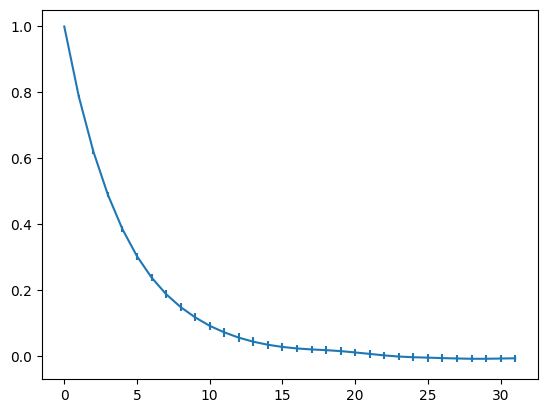

In [4]:
# Extent of the lattice
Nx = 16
Nt = 128
# The parameters in the action
m_sq = -1020.
lmbd = 10000.0
alpha = 0.007

#spectrum16, spectrum16_I2, pion_mass16, pion_mass16_err, pion_mass16_m0, pion_mass16_m0_err = get_spectrum(Nx,Nt,m_sq,lmbd,alpha,"2023-10-11")
spectrum16, spectrum16_I2, pion_mass16, pion_mass16_err, pion_mass16_m0, pion_mass16_m0_err = get_spectrum(Nx,Nt,m_sq,lmbd,alpha,"2025-09-15")

Loading output_data/measurements_8x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-05-30_3-1.bin
Loading output_data/measurements_8x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-05-31_3-1.bin
pipi energy is 0.4269518700774245/a +- 0.006044129505508585/a
pipim0 energy is 0.8550798461477959/a +- 0.004192906166919696/a
pipim0 energy is 2.0023489512364794*m_pi +- 0.030220108491428085*m_pi


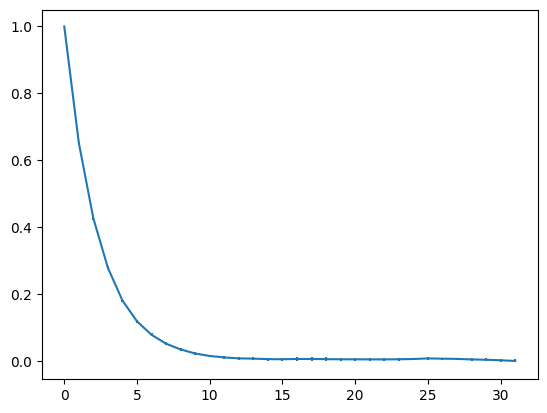

In [5]:
# Extent of the lattice
Nx = 8
Nt = 128
# The parameters in the action
m_sq = -1050.
lmbd = 10000.0
alpha = 0.05

#spectrum8, spectrum8_I2, pion_mass8, pion_mass8_err, pion_mass8_m0, pion_mass8_m0_err = get_spectrum(Nx,Nt,m_sq,lmbd,alpha,"2023-10-11")
spectrum8, spectrum8_I2, pion_mass8, pion_mass8_err, pion_mass8_m0, pion_mass8_m0_err = get_spectrum(Nx,Nt,m_sq,lmbd,alpha,"2025-09-15")

Loading output_data/measurements_12x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-13_3-1.bin
Loading output_data/measurements_12x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-16_3-1.bin
Loading output_data/measurements_12x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-17_3-1.bin
Loading output_data/measurements_12x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-19_3-1.bin
Loading output_data/measurements_12x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-20_3-1.bin
Loading output_data/measurements_12x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-24_3-1.bin
Loading output_data/measurements_12x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-25_3-1.bin
pipi energy is 0.4369844391125101/a +- 0.0071409747738147445/a
pipim0 energy is 0.659423949246831/a +- 0.004089314949698421/a
pipim0 energy is 1.508629334292932*m_pi +- 0.02641554746757118*m_pi


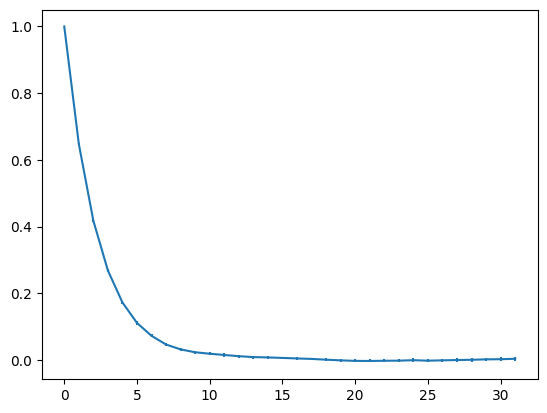

In [6]:
Nx = 12
#spectrumV2, spectrumV2_I2, pion_massV2, pion_massV2_err, pion_massV2_m0, pion_massV2_m0_err = get_spectrum(Nx,Nt,m_sq,lmbd,alpha,"2023-10-26")
spectrumV2, spectrumV2_I2, pion_massV2, pion_massV2_err, pion_massV2_m0, pion_massV2_m0_err = get_spectrum(Nx,Nt,m_sq,lmbd,alpha,"2025-09-15")

Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-13_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-16_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-17_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-19_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-20_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-23_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-24_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-25_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-26_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-29_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_100

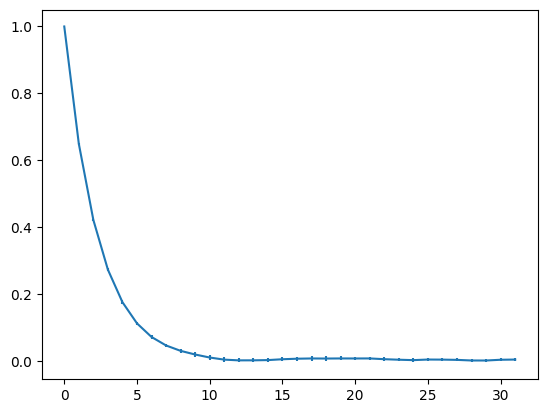

In [7]:
Nx = 16
#spectrumV3, spectrumV3_I2, pion_massV3, pion_massV3_err, pion_massV3_m0, pion_massV3_m0_err = get_spectrum(Nx,Nt,m_sq,lmbd,alpha,"2023-11-02")
spectrumV3, spectrumV3_I2, pion_massV3, pion_massV3_err, pion_massV3_m0, pion_massV3_m0_err = get_spectrum(Nx,Nt,m_sq,lmbd,alpha,"2025-09-15")

In [47]:
def plot_spec(spec, m_pi, m_pi_m0, m_pi_m0_err, E0, E0_err, E1, E1_err, m_pi_m0_rbc, m_pi_m0_rbc_err, fig, ax, ax_rbc=None, t_end=5, states=[], label_override=""):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "DejaVu Sans",        
        'font.weight' : 'normal',
        'font.size'   : 32
    })
    
    fig.set_figwidth(10)
    fig.set_figheight(10)
    
    fact = 1 #/m_pi
    
    spec = np.array(spec)
    if(states==[]):
        states=range(spec.shape[3])
    for i in states:
        if(label_override=="eig"):
            label = f"{np.round(spec[0,0,1:,i]/np.sum(spec[0,0,1:,i]**2)**0.5,2)}"
        else:
            label = label_override
        ax.errorbar(range(t_end), spec[:t_end,0,0,i]*fact, yerr=spec[:t_end,1,0,i]*fact, capsize=12, linewidth=3, markeredgewidth=3, label=label)
    
    xend = min(spec.shape[0], t_end) - 1
    if(m_pi_m0):
        ax.hlines(2, 0, xend, linestyles="dotted", color="blue", linewidth=6, label="$2E_{\\pi,p=0}$ and $2E_{\\pi,p=1}$")
    if(m_pi_m0):
        ax.fill_between([0, xend], [2*(m_pi_m0-m_pi_m0_err)*fact]*2, [2*(m_pi_m0+m_pi_m0_err)*fact]*2, alpha=0.2, color="blue")
        ax.hlines(2*m_pi_m0*fact, 0, xend, color="blue", linewidth=6, linestyles="dotted")

    if(ax_rbc==None):
        ax_rbc = ax
    else:
        ax_rbc.set_xticks([])
        ax_rbc.set_xlim([-0.5,0.5])
        ax_rbc.set_xlabel("24ID Ensemble")
        ax_rbc.set_ylabel("$E/m_\\pi$ (24ID)")
    if(m_pi_m0_rbc):
        ax_rbc.hlines(2, -1, 1, color="blue", linewidth=6, linestyles="dotted")
        #ax_rbc.errorbar(0, 2, capsize=12, markersize=10, fmt="s", color="blue")
    if(m_pi_m0_rbc):
        ax_rbc.fill_between([-1, 1], [2*(m_pi_m0_rbc-m_pi_m0_rbc_err)*fact]*2, [2*(m_pi_m0_rbc+m_pi_m0_rbc_err)*fact]*2, alpha=0.2, color="blue")
        ax_rbc.hlines(2*m_pi_m0_rbc*fact, -1, 1, color="blue", linewidth=6, linestyles="dotted")
        #ax_rbc.errorbar(0, 2*m_pi_m0_rbc, yerr=m_pi_m0_rbc_err, capsize=12, markersize=10, fmt="s", color="blue", label="$2E_{\\pi,p=0}$ and $2E_{\\pi,p=1}$ (24ID)")
    if(E0):
        ax_rbc.errorbar(0, E0, yerr=E0_err, capsize=12, markersize=10, fmt="o", color="blue", label="QCD Spectrum (24ID)")
    if(E1):
        ax_rbc.errorbar(0, E1, yerr=E1_err, capsize=12, markersize=10, fmt="o", color="blue")

    for l in fig.legends:
        l.remove()
    fig.legend(loc='upper center', bbox_to_anchor=(0.48, 1.2), ncol=1)
    #ax.legend(loc=[0.05,0.35])
    #ax.legend(loc=[0.05,0.05])
    
    ax.set_xlabel("$t$")
    ax.set_ylabel("$E/m_\\pi$")
    #fig.suptitle("Energy Eigenvalues vs Initial $t$")
    
    fig.savefig("energies.pdf", bbox_inches='tight')

In [48]:
# All values on 24x64 lattice
a = 1 / 1.023 # in inverse GeV
m_pi_RBC = 0.13944 # in lattice units
m_pi_RBC_err = 0.00017
m_pi_m0_rbc = 0.29572/m_pi_RBC
m_pi_m0_rbc_err = 0.00030/m_pi_RBC # doesn't include error in m_pi_RBC
E0_I0 = 0.27069/m_pi_RBC
E0_I0_err = 0.00041/m_pi_RBC # doesn't include error in m_pi_RBC
E1_I0 = 0.5308/m_pi_RBC
E1_I0_err = 0.0044/m_pi_RBC # doesn't include error in m_pi_RBC
E2_I0 = 0.695/m_pi_RBC
E2_I0_err = 0.012/m_pi_RBC # doesn't include error in m_pi_RBC

E0_I2 = 0.28130/m_pi_RBC
E0_I2_err = 0.00034/m_pi_RBC # doesn't include error in m_pi_RBC
E1_I2 = 0.60789/m_pi_RBC
E1_I2_err = 0.00031/m_pi_RBC # doesn't include error in m_pi_RBC

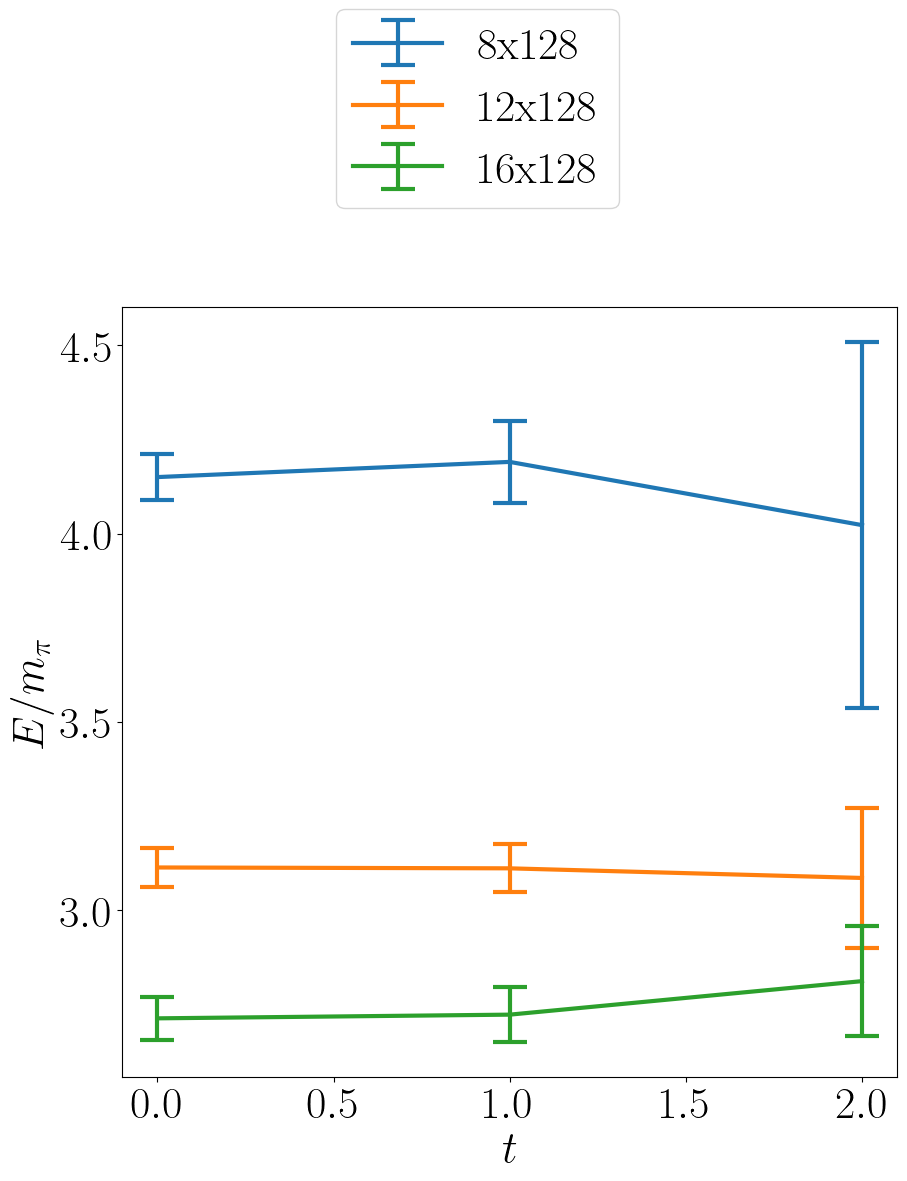

In [49]:
fig,ax = plt.subplots()

state = [2]
plot_spec(spectrum8, pion_mass8, 0, 0, 0, 0, 0, 0, 0, 0, fig, ax, None, 3, state, "8x128")
plot_spec(spectrumV2, pion_massV2, 0, 0, 0, 0, 0, 0, 0, 0, fig, ax, None, 3, state, "12x128")
plot_spec(spectrumV3, pion_massV3, 0, 0, 0, 0, 0, 0, 0, 0, fig, ax, None, 3, state, "16x128")

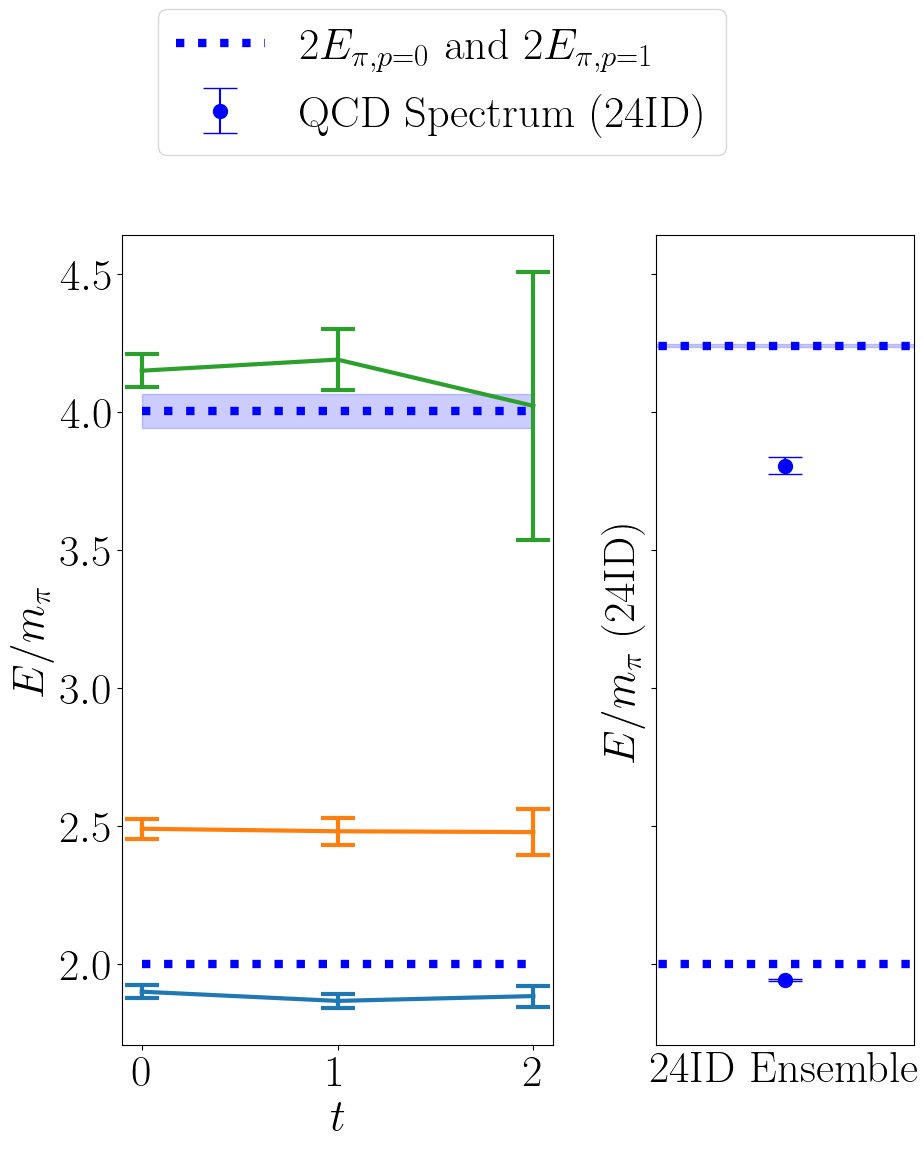

In [50]:
fig,axes = plt.subplots(1,2, gridspec_kw={'width_ratios': [2, 1.2]}, sharey=True)

plot_spec(spectrum8, pion_mass8, pion_mass8_m0, pion_mass8_m0_err, E0_I0, E0_I0_err, E1_I0, E1_I0_err, m_pi_m0_rbc, m_pi_m0_rbc_err, fig, axes[0], axes[1], 3)
plt.tight_layout()

[1.72689379 2.16362476 3.89806472]
[0.07326482 0.09160642 0.16427656]
3.7664480524353006
0.1563546367456258


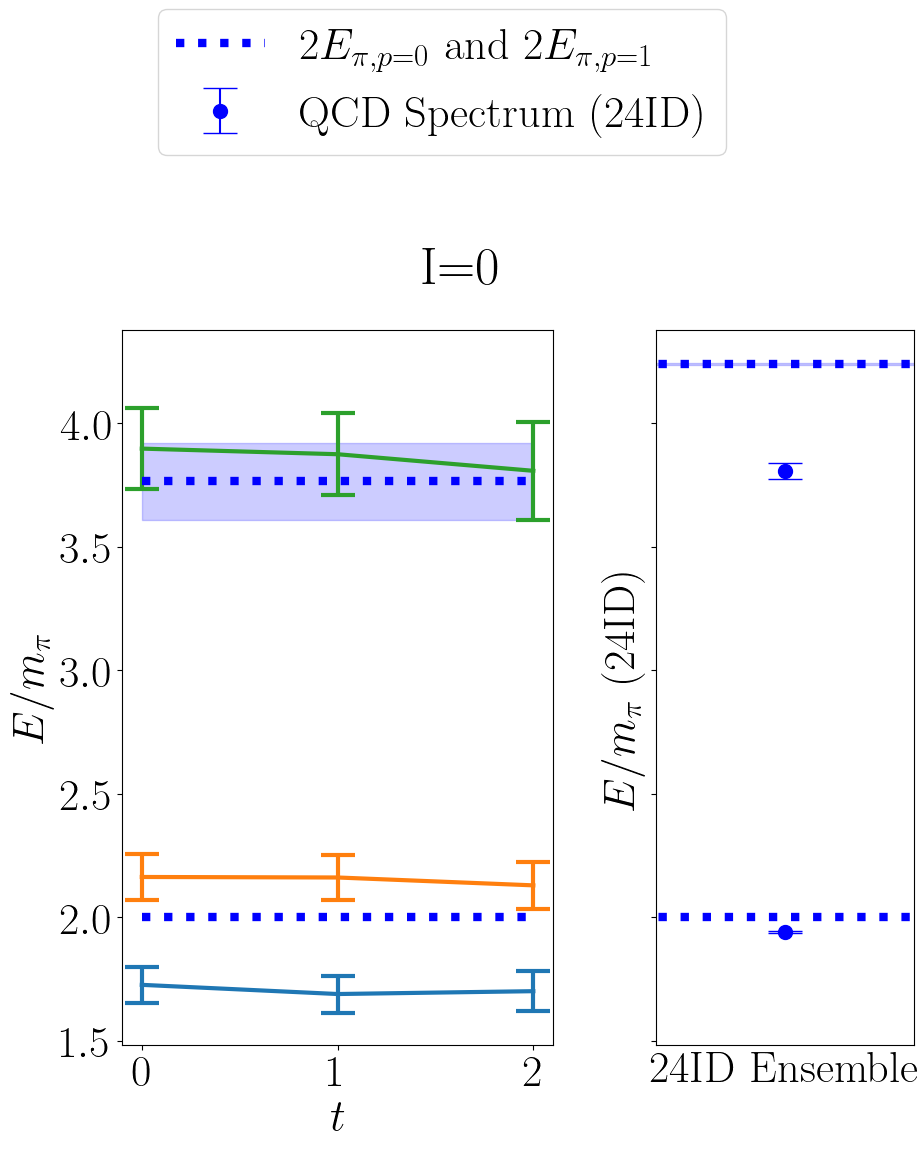

In [51]:
fig,axes = plt.subplots(1,2, gridspec_kw={'width_ratios': [2, 1.2]}, sharey=True)
fig.suptitle("I=0", y=0.94)

plot_spec(spectrum16, pion_mass16, pion_mass16_m0, pion_mass16_m0_err, E0_I0, E0_I0_err, E1_I0, E1_I0_err, m_pi_m0_rbc, m_pi_m0_rbc_err, fig, axes[0], axes[1], 3)
plt.tight_layout()
t=0
print(np.array(spectrum16)[t,0,0,:]) # val
print(np.array(spectrum16)[t,1,0,:]) # err
print(2*pion_mass16_m0)
print(2*pion_mass16_m0_err)

In [12]:
pion_mass16, pion_mass16_err

(0.23899330981360706, 0.010258328736096849)

[1.99542278 3.84606226]
[0.07837821 0.16331698]


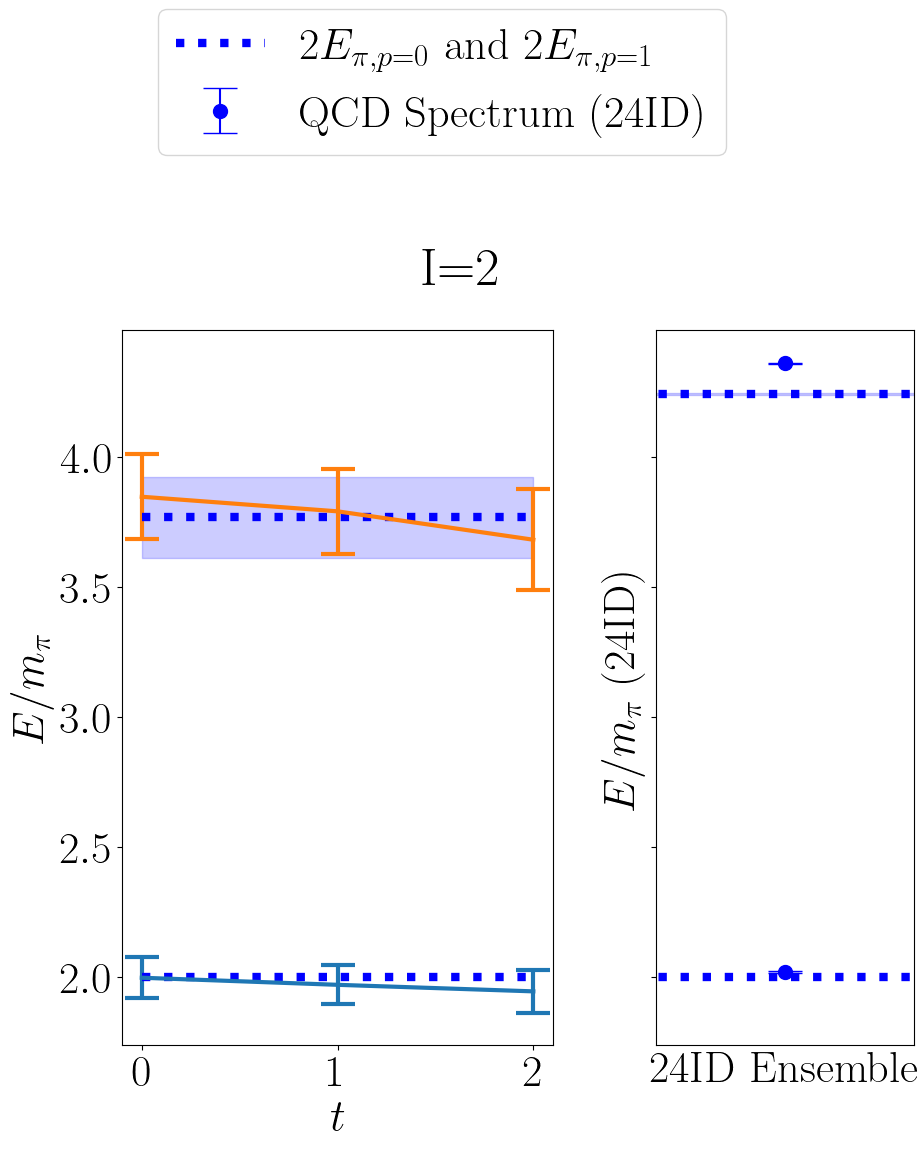

In [52]:
fig,axes = plt.subplots(1,2, gridspec_kw={'width_ratios': [2, 1.2]}, sharey=True)
fig.suptitle("I=2", y=0.94)

plot_spec(spectrum16_I2, pion_mass16, pion_mass16_m0, pion_mass16_m0_err, E0_I2, E0_I2_err, E1_I2, E1_I2_err, m_pi_m0_rbc, m_pi_m0_rbc_err, fig, axes[0], axes[1], 3)

plt.tight_layout()

t=0
print(np.array(spectrum16_I2)[t,0,0,:]) # val
print(np.array(spectrum16_I2)[t,1,0,:]) # err

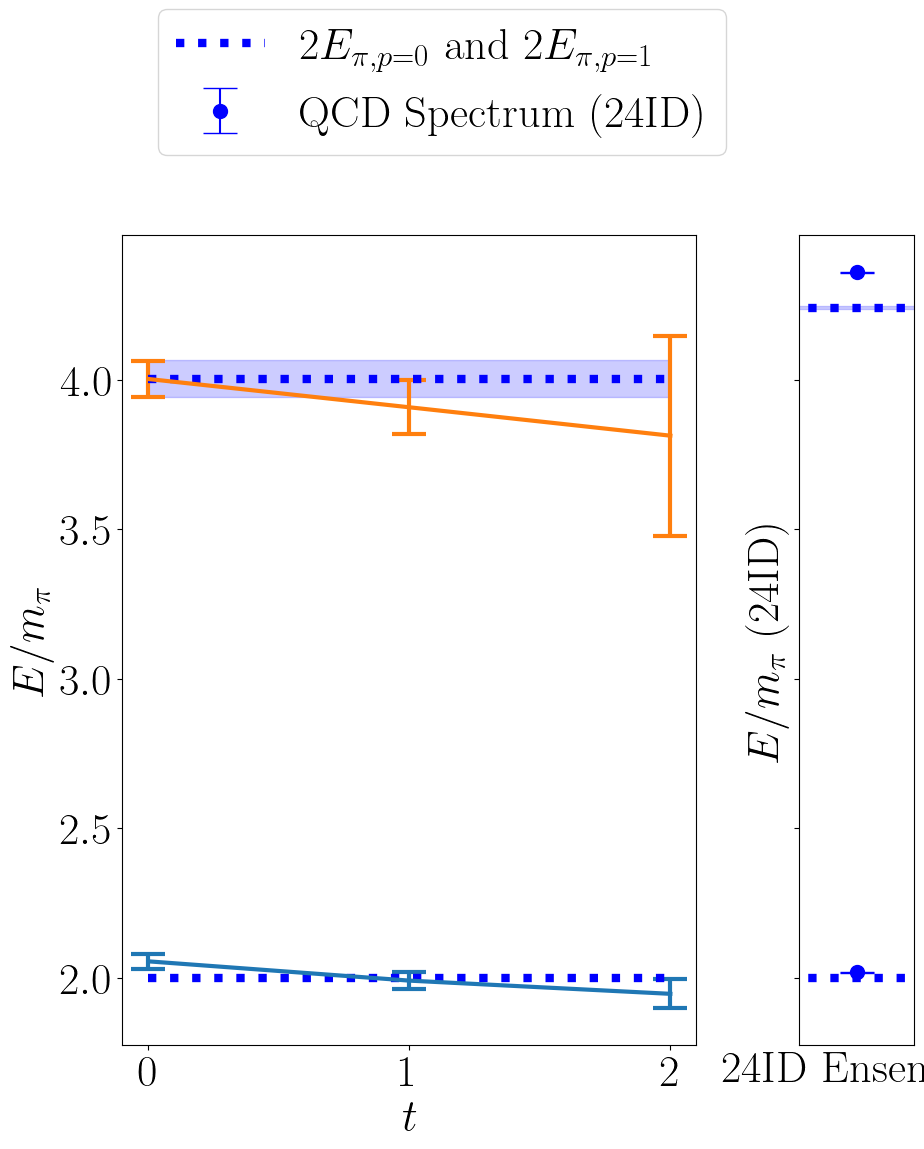

In [53]:
fig,axes = plt.subplots(1,2, gridspec_kw={'width_ratios': [5, 1]}, sharey=True)

plot_spec(spectrum8_I2, pion_mass8, pion_mass8_m0, pion_mass8_m0_err, E0_I2, E0_I2_err, E1_I2, E1_I2_err, m_pi_m0_rbc, m_pi_m0_rbc_err, fig, axes[0], axes[1], 3)
plt.tight_layout()

In [15]:
print(np.array(spectrum16)[0,0,0]/pion_mass16)
print(np.array(spectrum16)[0,1,0]/pion_mass16)

[ 7.22569929  9.05307666 16.3103508 ]
[0.30655593 0.38330118 0.68736885]


In [16]:
print(np.array(spectrum16_I2)[0,0,0]/pion_mass16)
print(np.array(spectrum16_I2)[0,1,0]/pion_mass16)

[ 8.349283   16.09276121]
[0.3279515  0.68335378]


# Lattice Spacing

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from calculate_corrs import *
from data_analysis_blocked import *

In [66]:
# Extent of the lattice
Nx = 16
Nt = 128
# The parameters in the action
m_sq = -1050.
lmbd = 10000.0
alpha = 0.05
data = LatticeData(Nx, Nt, m_sq, lmbd, alpha, "3-1", 1000, 200)
data.load_all_data()

Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-13_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-16_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-17_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-19_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-20_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-23_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-24_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-25_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-26_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-29_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_100

In [67]:
data.calc_pion_corrs()
#data.calc_axpi_corrs()

pi_corr_avg_blocks = np.array(data.get_jackknife_blocks(data.pi_corrs))
pion_mass_blocks = data.get_jackknife_blocks(data.pi_corrs, data.find_mass_from_fit)
fit, fit_err = data.get_errors_from_blocks(data.find_mass_from_fit(data.pi_corr_avgs), pion_mass_blocks)
print(fit[0])
print(fit_err[0])

0.41177598188503545
0.007359801296337499


[2.20069970e-01 7.23849147e+03]
[7.65994680e-03 1.01750688e+02]


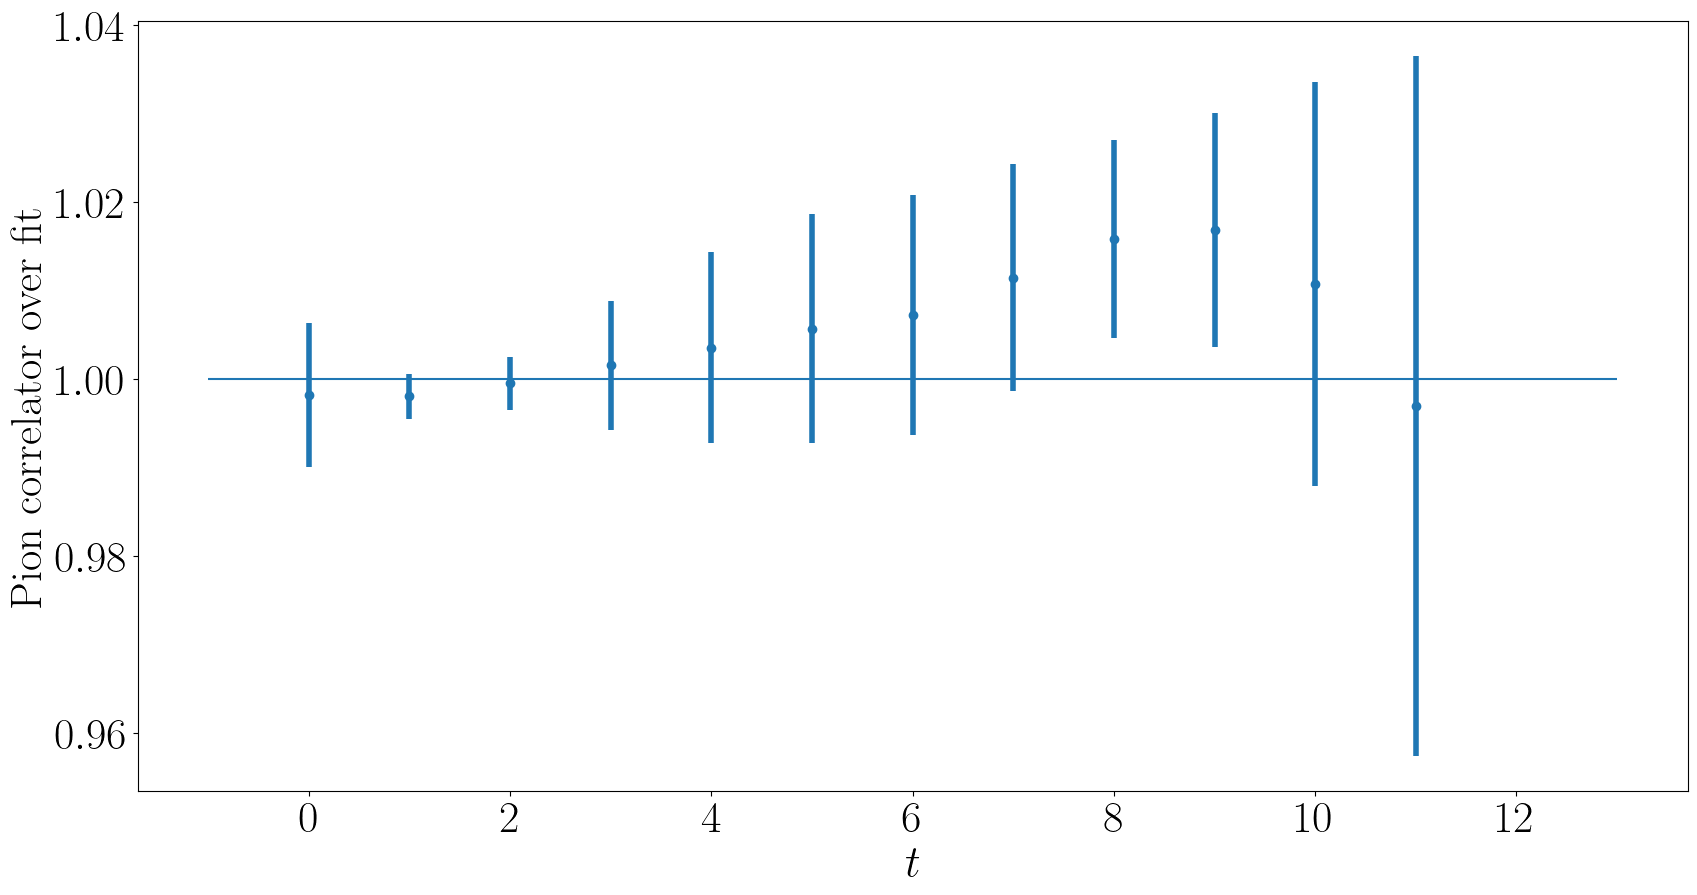

In [39]:
pi_corr_avg_blocks = np.array(data.get_jackknife_blocks(data.pi_corrs))
pion_mass_blocks = data.get_jackknife_blocks(data.pi_corrs, data.find_mass_from_fit)
nt_plt = np.arange(0,len(data.pi_corr_avgs))
pi_corr_div_fit_blocks = [pi_corr_avg_blocks[b] / data.cosh_model(nt_plt, pion_mass_blocks[b][1], pion_mass_blocks[b][0]) for b in range(len(pi_corr_avg_blocks))]
pi_corr_div_fit, pi_corr_div_fit_err = data.get_errors_from_blocks(np.mean(pi_corr_div_fit_blocks,axis=0), pi_corr_div_fit_blocks)

fig,ax = plt.subplots(1)
plt.rcParams.update({
        "text.usetex": True,
        "font.family": "DejaVu Sans",        
        'font.weight' : 'normal',
        'font.size'   : 32
    })
    
fig.set_figwidth(20)
fig.set_figheight(10)

ax.set_xlabel("$t$")
ax.set_ylabel("Pion correlator over fit")

end = 12
ax.hlines(1, -1, end+1)
ax.errorbar(range(0,end), pi_corr_div_fit[:end], yerr=pi_corr_div_fit_err[:end], linewidth=4, fmt="o")

#plt.tight_layout()
fig.savefig("corrs_over_model.pdf", bbox_inches='tight')

In [31]:
data.calc_fpi()

F_pi is 0.27685386871866474/a +- 0.001487185482746938/a
m_pi is 0.41774291530612995/a +- 0.002567505715373736/a
L is 4.750498951174353 +- 0.025518419188753628 fm
a inverse is 0.3322956437375758 +- 0.001784072722726201 GeV
m_pi over f_pi is 1.5156553563334954 +- 0.018720140418787164


In [11]:
Ep_over_mpi_blocks = data.get_jackknife_blocks(data.pi_corrs, lambda x : (1 + (2*np.pi / data.find_mass_from_fit(x)[0] / data.Nx)**2)**0.5)
Ep_over_mpi_blocks, Ep_over_mpi_blocks_err = data.get_errors_from_blocks((1 + (2*np.pi / data.find_mass_from_fit(data.pi_corr_avgs)[0] / data.Nx)**2)**0.5, Ep_over_mpi_blocks)
Ep_over_mpi_blocks, Ep_over_mpi_blocks_err

(1.6096843113857793, 0.00840968323805919)

In [70]:
Ep_over_mpi_16x128 = 2.0434355532623156
Ep_over_mpi_16x128_err = 0.05367436113639503

Ep_over_mpi_rbc = (1 + (2*3.14159 / 0.13944 / 24)**2)**0.5

print(2*Ep_over_mpi_16x128)
print(2*Ep_over_mpi_rbc)

4.086871106524631
4.254419589022895


In [ ]:
ainv_8x16 = 0.32366513924586054 # GeV
ainv_8x16_err = 0.00613010516461717
L_8x16 = 4.8755661259641 # fm
L_8x16_err = 0.09217957993772387
ainv_12x24 = 0.47385568339420336
ainv_12_24_err = 0.012349466294904939
L_12x24 = 4.993756212352786
L_12x24_err = 0.12984629622224625
ainv_16x32 = 0.6788397886774903
ainv_16x32_err = 0.02798670861264779
L_16x32 = 4.643073218981023
L_16x32_err = 0.19048025310653305
ainv_16x32_l1000 = 1.48553441
ainv_16x32_l1000_err = 0.0384952
ainv_16x32_l100000 = 0.66254713
ainv_16x32_l100000_err = 0.02163619
ainv_16x128 = 0.636313700294509
ainv_16x128_err = 0.009903496266224663
L_16x128 = 4.960545690689975
L_16x128_err = 0.07731286164820352
ainv_16x128_m_105_a_05 = 0.3272037710709607
ainv_16x128_m_105_a_05_err = 0.0025934499333679973
L_16x128_m_105_a_05 = 9.648523284228405
L_16x128_m_105_a_05_err = 0.07651569851459447
ainv_12x128_m_105_a_05 = 0.3271336233972093
ainv_12x128_m_105_a_05_err = 0.0018634058129276762
L_12x128_m_105_a_05 = 7.238164480406363
L_12x128_m_105_a_05_err = 0.04121096607789187
ainv_8x128_m_105_a_05 = 0.3322956437375758
ainv_8x128_m_105_a_05_err = 0.001784072722726201
L_8x128_m_105_a_05 = 4.750498951174353
L_8x128_m_105_a_05_err = 0.025518419188753628

# Parameters vs $\lambda$

In [42]:
import pandas as pd

In [43]:
df8=pd.read_csv("results/simulation_results_8x16_10_06_23.csv")
df12=pd.read_csv("results/simulation_results_12x24_10_06_23.csv")
df16=pd.read_csv("results/simulation_results_16x32_10_06_23.csv")

In [44]:
# Shift points
def plot_params_vs_lambda(lattice_size):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "DejaVu Sans",        
        'font.weight' : 'normal',
        'font.size'   : 32
    })
    
    fig,ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    
    if lattice_size=="8x8x8x16":
        msq_ratio = 0.105
        alpha = 0.05
        df = df8
    elif lattice_size=="12x12x12x24":
        msq_ratio = 0.103
        alpha = 0.015
        df = df12
    elif lattice_size=="16x16x16x32":
        msq_ratio = 0.102
        alpha = 0.007
        df = df16
    else:
        print("Error: Unexpected lattice size!")
        return
    
    lmbd = 1000.0
    a=df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==-round(msq_ratio*lmbd,3)) & (df['alpha']==alpha)]
    ax.errorbar(x=["$\\langle\\phi_0\\rangle$", "$m_\\pi$", "$m_\\sigma^{eff}$", "$F_\\pi$"], 
                y=[a['sigma vev'].to_list()[0], a['pion mass'].to_list()[0], a['sigma effective mass'].to_list()[0], a['fpi'].to_list()[0]], 
                yerr=[a['sigma vev error'].to_list()[0], a['pion mass error'].to_list()[0], a['sigma effective mass error'].to_list()[0], a['fpi error'].to_list()[0]], 
                label=f'$\\lambda={lmbd}$', fmt='o', ms=20)

    lmbd = 10000.0
    a=df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==-round(msq_ratio*lmbd,3)) & (df['alpha']==alpha)]
    ax.errorbar(x=["$\\langle\\phi_0\\rangle$", "$m_\\pi$", "$m_\\sigma^{eff}$", "$F_\\pi$"], 
                y=[a['sigma vev'].to_list()[0], a['pion mass'].to_list()[0], a['sigma effective mass'].to_list()[0], a['fpi'].to_list()[0]], 
                yerr=[a['sigma vev error'].to_list()[0], a['pion mass error'].to_list()[0], a['sigma effective mass error'].to_list()[0], a['fpi error'].to_list()[0]], 
                label=f'$\\lambda={lmbd}$', fmt='o', ms=20)

    lmbd = 100000.0
    a=df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==-round(msq_ratio*lmbd,3)) & (df['alpha']==alpha)]
    ax.errorbar(x=["$\\langle\\phi_0\\rangle$", "$m_\\pi$", "$m_\\sigma^{eff}$", "$F_\\pi$"], 
                y=[a['sigma vev'].to_list()[0], a['pion mass'].to_list()[0], a['sigma effective mass'].to_list()[0], a['fpi'].to_list()[0]], 
                yerr=[a['sigma vev error'].to_list()[0], a['pion mass error'].to_list()[0], a['sigma effective mass error'].to_list()[0], a['fpi error'].to_list()[0]], 
                label=f'$\\lambda={lmbd}$', fmt='o', ms=20)

    ax.legend()
    #fig.suptitle(f"Observables at physical point for various $\lambda$ ({lattice_size})")

    fig.savefig("lambda_comparison.pdf", facecolor=(1, 1, 1))

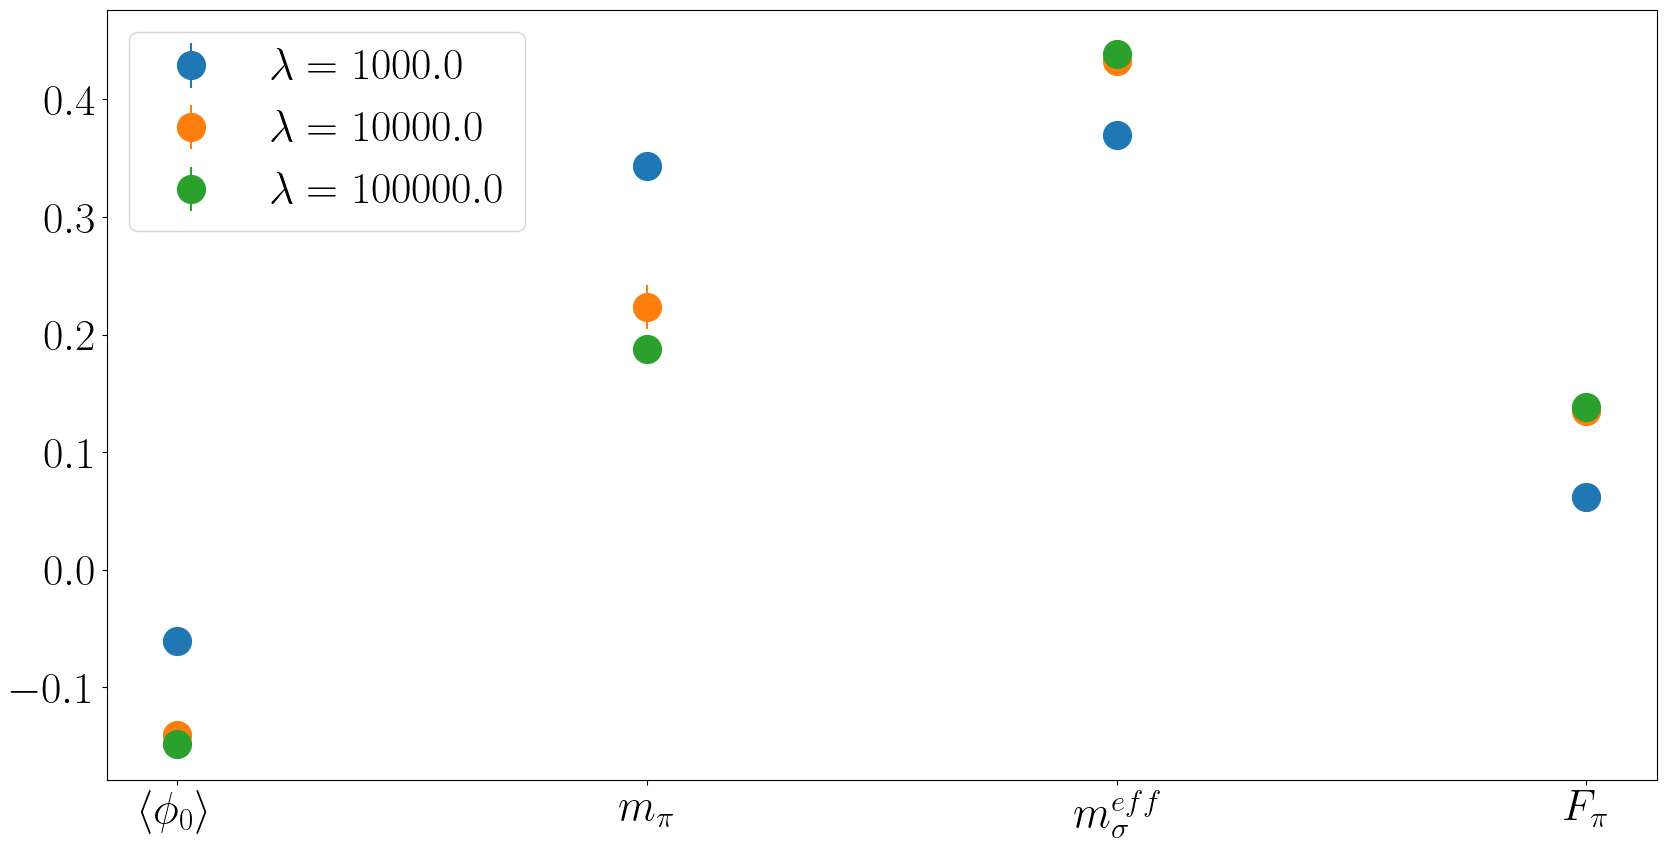

In [45]:
plot_params_vs_lambda("16x16x16x32")

# Parameters vs $m^2$

In [46]:
def plot_params_vs_msq(lattice_size, msq_start, msq_end, fig, ax):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "DejaVu Sans",        
        'font.weight' : 'normal',
        'font.size'   : 32
    })
    
    fig.set_figwidth(20)
    fig.set_figheight(10)

    lmbd = 10000.0
    if lattice_size=="8x8x8x16":
        ax.vlines(x=-0.105, ymin=-1, ymax=2, color='black', linestyle='dotted', label='Physical Point')
        alpha = 0.05
        df = df8
    elif lattice_size=="12x12x12x24":
        ax.vlines(x=-0.103, ymin=-1, ymax=2, color='black', linestyle='dotted', label='Physical Point')
        alpha = 0.015
        df = df12
    elif lattice_size=="16x16x16x32":
        ax.vlines(x=-0.102, ymin=-1, ymax=2, color='black', linestyle='dotted', linewidth=3, label='Physical Point')
        alpha = 0.007
        df = df16
    
    a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['alpha']==alpha)].sort_values('m^2')
    start = a['m^2'].tolist().index(msq_start)
    end = a['m^2'].tolist().index(msq_end)+1
    ax.errorbar(a['m^2'][start:end]/lmbd, a['pion mass'][start:end].abs(), yerr=a['pion mass error'][start:end], linewidth=3, label='$m_\\pi$')
    sigma_fact = 1
    a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['alpha']==alpha)].sort_values('m^2')
    ax.errorbar(a['m^2'][start:end]/lmbd, a['fpi'][start:end].abs(), yerr=a['fpi error'][start:end], linewidth=3, label='$F_\\pi$')

    print(a['m^2']/a['lambda'])
    print(a['pion mass'])
    print(a['pion mass error'])
    #print(a['sigma effective mass']/2/a['pion mass'])
    
    a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['alpha']==alpha)].sort_values('m^2')
    #ax.errorbar(a['m^2'][start:end]/lmbd, a['fpi2'][start:end].abs(), yerr=a['fpi2 error'][start:end], label='$F_\pi$ (pion corrs)')
    
    a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['alpha']==alpha)].sort_values('m^2')
    ax.errorbar(a['m^2'][start:end]/lmbd, a['sigma effective mass'][start:end].abs()*sigma_fact, yerr=a['sigma effective mass error'][start:end]*sigma_fact, linewidth=3, label='$m_\\sigma^{eff}$')
    
    ax.legend()
    ax.legend(loc=[0.67,0.07])
    #ax.set_xlim([-0.107,-0.099])
    ax.set_ylim([0.0,1.3])#max(a['sigma effective mass'][start:end])+0.1])
    #ax.locator_params(nbins=4)
    
    ax.set_xlabel("$m^2/\\lambda$")
    
    #fig.suptitle(fr"Parameters vs $m^2/\lambda$ for {lattice_size}, $\lambda$={lmbd}, $\alpha$={alpha}")
    fig.savefig("msq_plot.pdf",facecolor=(1, 1, 1))

7    -0.200
6    -0.150
10   -0.120
11   -0.115
12   -0.110
5    -0.106
4    -0.104
3    -0.103
2    -0.102
1    -0.100
13   -0.099
14   -0.095
15   -0.090
16   -0.080
0    -0.070
dtype: float64
7     0.096890
6     0.105269
10    0.132181
11    0.128697
12    0.155226
5     0.184320
4     0.195015
3     0.207276
2     0.223413
1     0.303053
13    0.359674
14    0.540765
15    0.753070
16    1.105499
0     1.426642
Name: pion mass, dtype: float64
7     0.006616
6     0.005705
10    0.008035
11    0.007476
12    0.010247
5     0.016714
4     0.016826
3     0.014080
2     0.019034
1     0.009035
13    0.009285
14    0.006834
15    0.006666
16    0.008660
0     0.005792
Name: pion mass error, dtype: float64


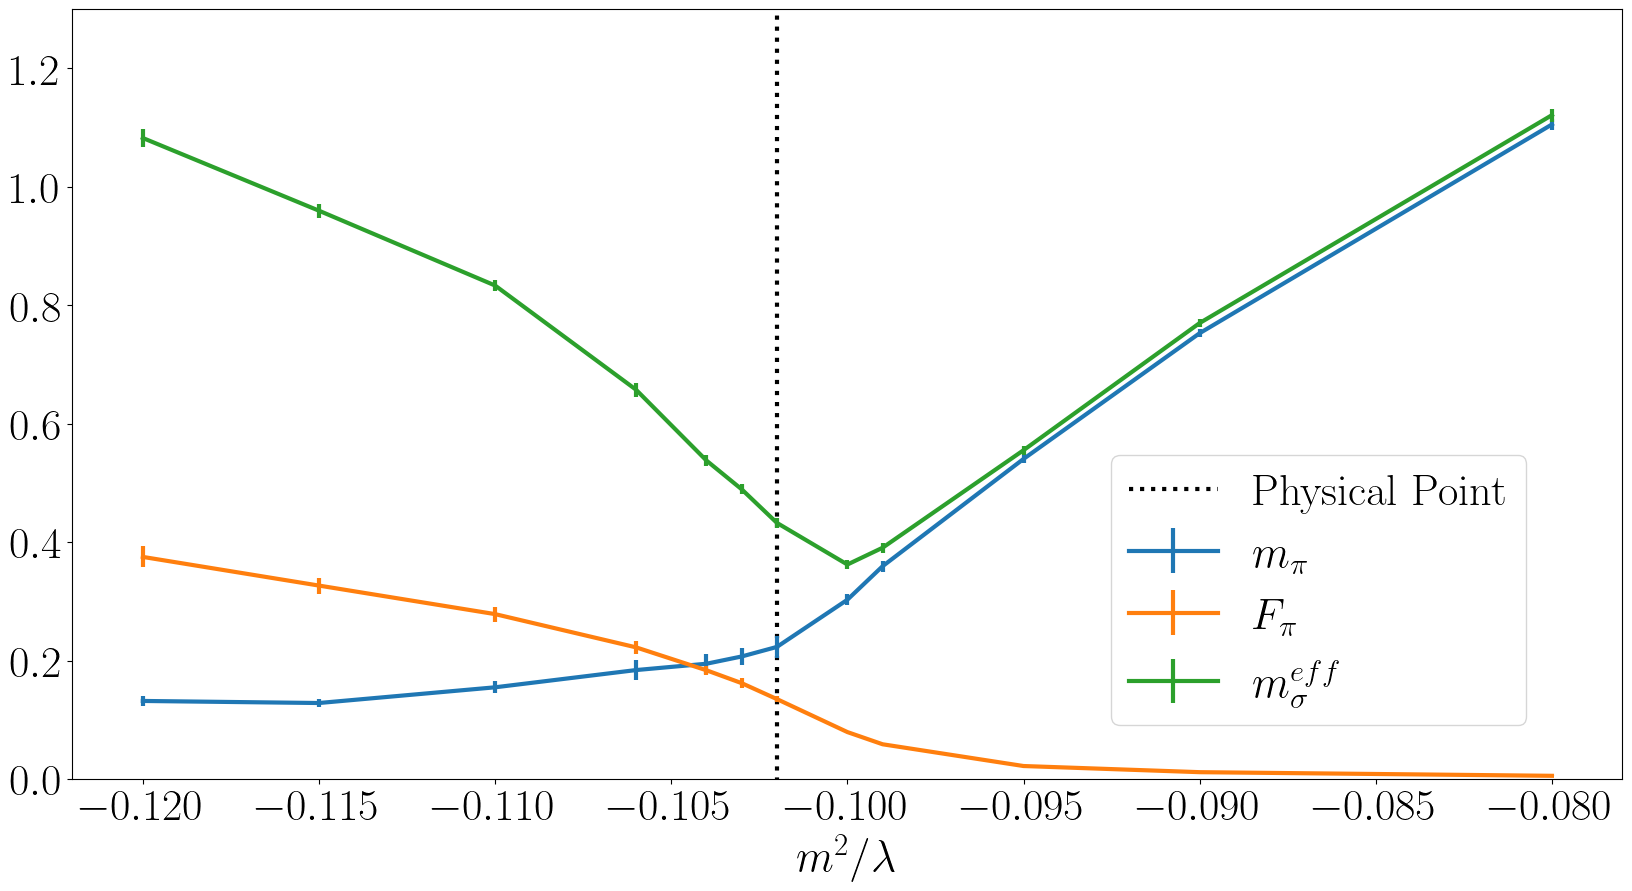

In [47]:
fig,ax = plt.subplots()

#plot_params_vs_msq("8x8x8x16", -1200., -800., fig, ax)
#plot_params_vs_msq("12x12x12x24", -1200., -800., fig, ax)
plot_params_vs_msq("16x16x16x32", -1200., -800., fig, ax)

# $\phi^2$ Distribution

In [8]:
from data_analysis_blocked import *

In [9]:
def get_psq_dist(lattice_size, lmbd):
    if lattice_size=="8x8x8x16":
        Nx = 8
        Nt = 16
        m_sq = -round(0.105*lmbd, 3)
        alpha = 0.05
    elif lattice_size=="12x12x12x24":
        Nx = 12
        Nt = 24
        m_sq = -round(0.103*lmbd, 3)
        alpha = 0.015
    elif lattice_size=="16x16x16x32":
        Nx = 16
        Nt = 32
        m_sq = -round(0.102*lmbd, 3)
        alpha = 0.007
    else:
        print("Error: Unexpected lattice size!")
        return
    
    version = "3-1"
    # The number of trajectories until thermalization
    cutoff = 3000
    block_size = 100

    # Load data
    data = LatticeData(Nx, Nt, m_sq, lmbd, alpha, version, cutoff, block_size)
    print(f"output_data/*_{data.Nx}x{data.Nt}_msq_{data.msq}_lmbd_{data.lmbd}_alph_{data.alpha}_*_{data.version}.bin")
    data.load_all_data()

    return data.phi_sq_dist, data.psq_dist_center/32.0

In [10]:
def plot_psq_dist(lattice_size, lmbd, fig, ax):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "DejaVu Sans",        
        'font.weight' : 'normal',
        'font.size'   : 32
    })

    fig.set_figwidth(20)
    fig.set_figheight(10)

    phi_sq_dist, step_size = get_psq_dist(lattice_size, lmbd)
    ax.plot(np.multiply(range(64),step_size),np.multiply(phi_sq_dist[-64:], 1/np.sum(phi_sq_dist[-64:])), label=f"$\\lambda={lmbd}$", linewidth=3)

    ax.set_xlabel("Value for $\\sum_i\\phi_i^2$")
    ax.set_ylabel("Probability Density")

    ax.legend()

    fig.savefig("phi_sq_dist.pdf")

    #plt.vlines([vev_phi0[i]**2], 0, np.max(10))
    #print(phi_sq_dist)

output_data/*_16x32_msq_-102.0_lmbd_1000.0_alph_0.007_*_3-1.bin
Loading output_data/measurements_16x32_msq_-102.0_lmbd_1000.0_alph_0.007_2023-05-30_3-1.bin
Loading output_data/measurements_16x32_msq_-102.0_lmbd_1000.0_alph_0.007_2023-06-01_3-1.bin
Loading output_data/measurements_16x32_msq_-102.0_lmbd_1000.0_alph_0.007_2023-06-02_3-1.bin
Loading output_data/measurements_16x32_msq_-102.0_lmbd_1000.0_alph_0.007_2023-06-03_3-1.bin
Loading output_data/measurements_16x32_msq_-102.0_lmbd_1000.0_alph_0.007_2023-06-04_3-1.bin
Loading output_data/measurements_16x32_msq_-102.0_lmbd_1000.0_alph_0.007_2023-06-06_3-1.bin
output_data/*_16x32_msq_-1020.0_lmbd_10000.0_alph_0.007_*_3-1.bin
Loading output_data/measurements_16x32_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-05-24_3-1.bin
Loading output_data/measurements_16x32_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-05-26_3-1.bin
Loading output_data/measurements_16x32_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-05-30_3-1.bin
output_data/*_16x32_msq_-10200.0_lmb

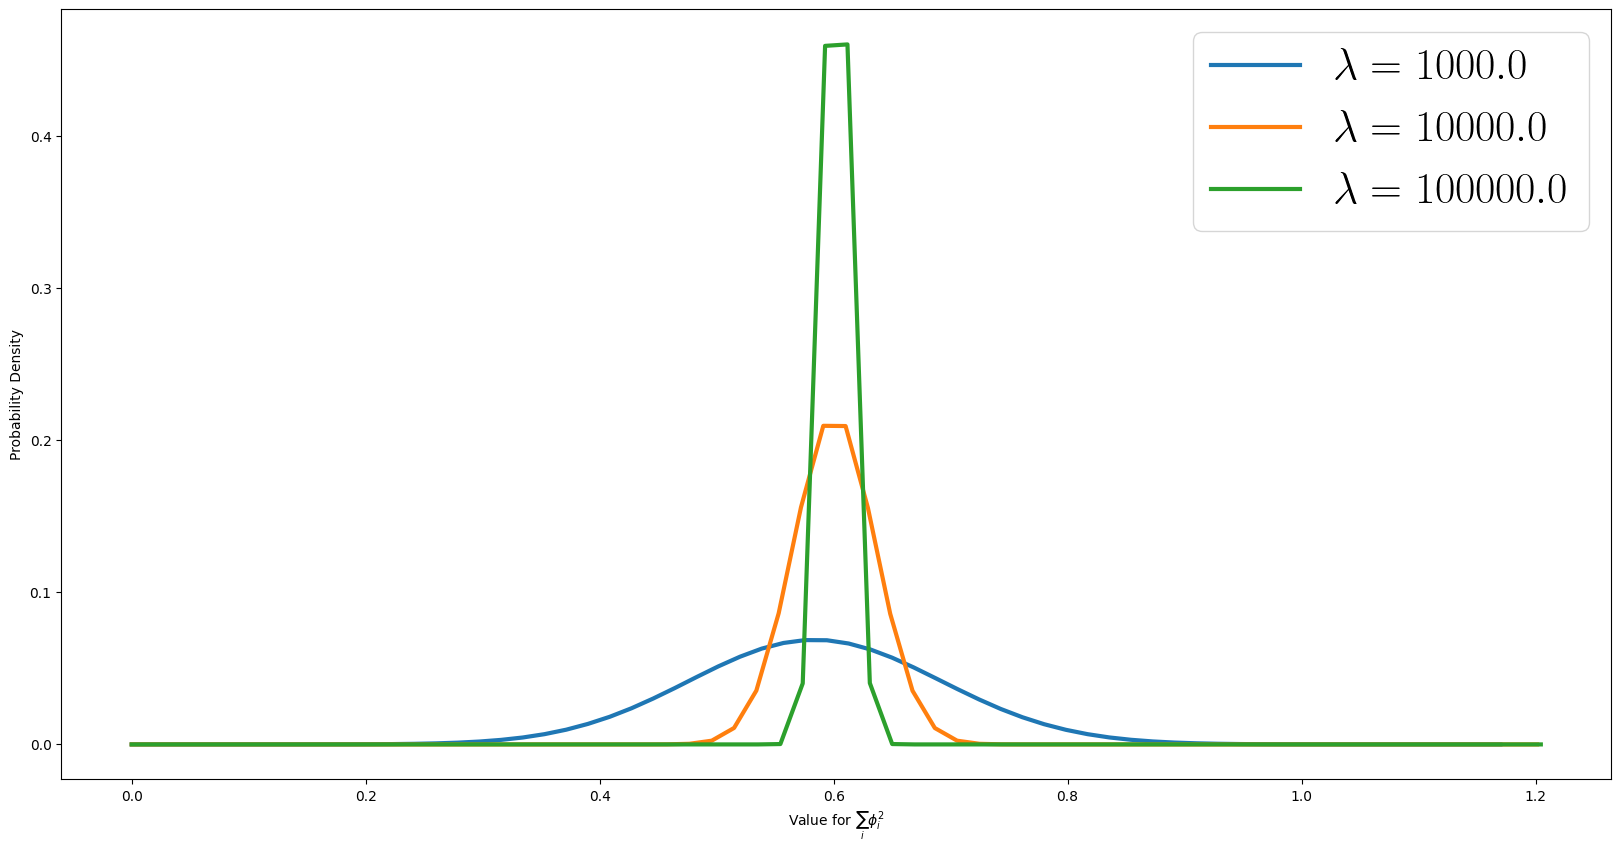

In [11]:
fig,ax = plt.subplots()

plot_psq_dist("16x16x16x32", 1000.0, fig, ax)
plot_psq_dist("16x16x16x32", 10000.0, fig, ax)
plot_psq_dist("16x16x16x32", 100000.0, fig, ax)